## Asymptotic Notation

Asymptotic notation describes how a function grows with respect to input size $n$.

---

### Big $O$ — Upper Bound

We say  
$$
f(n) = O(g(n))
$$
if there exist constants $c > 0$ and $n_0$ such that for all $n \ge n_0$,
$$
0 \le f(n) \le c\, g(n).
$$

---

### Big $\Omega$ — Lower Bound

We say  
$$
f(n) = \Omega(g(n))
$$
if there exist constants $c > 0$ and $n_0$ such that for all $n \ge n_0$,
$$
f(n) \ge c\, g(n).
$$

---

### Big $\Theta$ — Tight Bound

We say  
$$
f(n) = \Theta(g(n))
$$
if there exist constants $c_1, c_2 > 0$ and $n_0$ such that for all $n \ge n_0$,
$$
c_1 g(n) \le f(n) \le c_2 g(n).
$$

---


### Simple Example

For a list
$$
L = [\,l_1, l_2, \dots, l_{2n}\,],
$$
suppose we want to compute the sum of the odd-indexed elements:
$$
\sum_{k=1}^{n} l_{2k-1}.
$$

There are $n$ such elements, so evaluating the sum requires **$n - 1$ additions**, i.e., $\Theta(n)$ arithmetic operations.

Since
$$
n - 1 \le n,
$$
we can choose $c = 1$ and $g(n) = n$, and conclude that this is a  **linear-time algorithm**, i.e.,
$$
T(n) = O(n).
$$

---

### Recurrence Tree Expansion

Binary search on a sorted list works by:
* determining which half of the list may contain the target, and  
* checking whether the middle element is equal to the target.

This means that each recursive call does a constant amount of work. Thus binary search satisfies the recurrence
$$
T(n) = T\!\left(\frac{n}{2}\right) + O(1).
$$


### Expanding the Recurrence

Unrolling the recurrence $k$ times gives
$$
T(n) = T\!\left(\frac{n}{2^k}\right) + k\,O(1).
$$

Since the $O(1)$ term is bounded above by some constant $M$, we have
$$
k\,O(1) \le kM = O(k).
$$


### Reaching the Base Case

The recursion stops when the subproblem size becomes 1:
$$
\frac{n}{2^k} = 1 
\quad\Longleftrightarrow\quad 
n = 2^k
\quad\Longleftrightarrow\quad 
k = \log_2 n.
$$

Substituting this value of $k$ back into the expanded form:
$$
T(n) = T(1) + (\log_2 n)\,O(1).
$$

The term \(T(1)\) is the time to check a single element, which is constant:
$$
T(1) = O(1).
$$

Thus,
$$
T(n) = O(1) + O(\log_2 n) = O(\log n).
$$

# Analysis

In [1]:
import time
from typing import Callable, List, Protocol

import matplotlib.pyplot as plt

In [2]:
class CallablePlotProtocol(Protocol):
    def __call__(self, n: int) -> None: ...
    def plot(self, ax: plt.Axes, sizes: range) -> None: ...


def constant(n: int) -> None:
    return 42


def linear(n: int) -> None:
    s = 0
    for i in range(n):
        s += i


def quadratic(n: int) -> None:
    s = 0
    for i in range(n):
        for j in range(n):
            s += i * j


def exponential(n: int) -> int:
    if n <= 1:
        return 1
    else:
        return exponential(n - 1) + exponential(n - 2)


class ComplexityFunction:
    def __init__(self, func: Callable[[int], None]):
        self.func = func

    def __call__(self, n: int) -> None:
        return self.func(n)

    def plot(self, ax: plt.Axes, sizes: range) -> None:
        times = []
        for n in sizes:
            start = time.perf_counter()
            self.func(n)
            times.append(time.perf_counter() - start)
        ax.plot(sizes, times)
        ax.set_title(f"O({self.func.__name__}) Time Complexity")
        ax.set_xlabel("Input size n")
        ax.set_ylabel("Time (seconds)")


class ComplexityPlotter:
    def __init__(
        self,
        complexities: List[CallablePlotProtocol],
        sizes_list: List[range],
    ):
        self.complexities = complexities
        self.sizes_list = sizes_list

    def plot_all(self):
        rows = len(self.complexities) // 2 + len(self.complexities) % 2
        fig, axes = plt.subplots(rows, 2, figsize=(14, 5 * rows))
        axes = axes.flatten()
        for i, complexity in enumerate(self.complexities):
            complexity.plot(axes[i], self.sizes_list[i])
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])  # Remove empty subplots
        plt.tight_layout()
        plt.show()

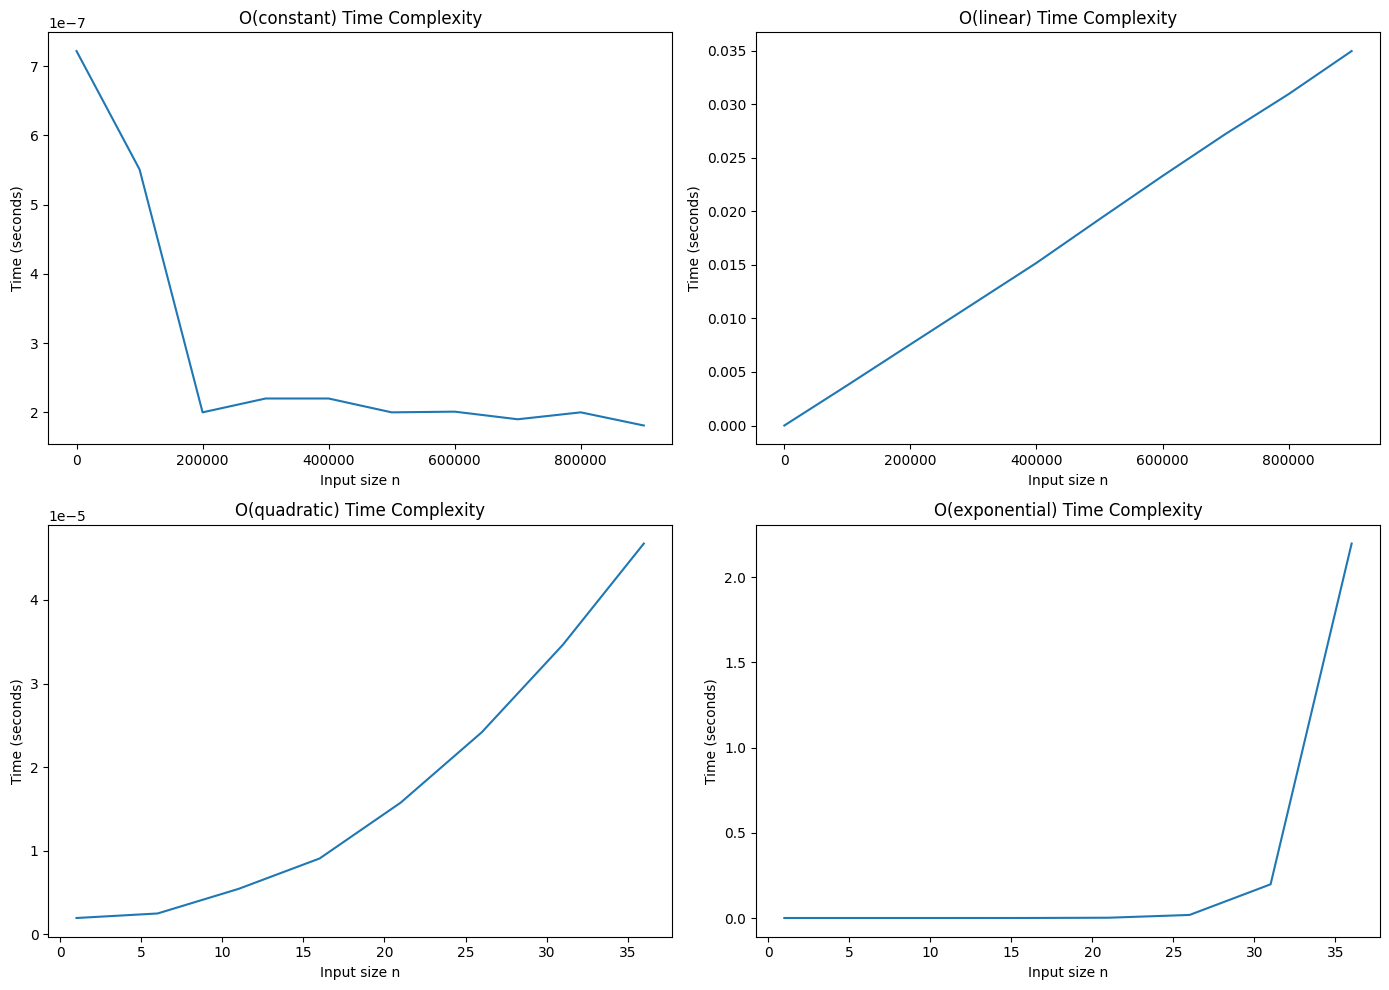

In [3]:
const_func = ComplexityFunction(constant)
linear_func = ComplexityFunction(linear)
quad_func = ComplexityFunction(quadratic)
exp_func = ComplexityFunction(exponential)

sizes_large = range(1, int(1e6), int(1e5))
sizes_small = range(1, 40, 5)

plotter = ComplexityPlotter(
    complexities=[const_func, linear_func, quad_func, exp_func],
    sizes_list=[sizes_large, sizes_large, sizes_small, sizes_small],
)
plotter.plot_all()